## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [5]:
df = pd.read_csv('data.csv')

In [6]:
#printing first 5 rows
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [7]:
#printing the shape of the dataset
df.shape

(2227, 3)

In [8]:
#summary of dataset
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [9]:
#frequency table
pd.crosstab(index = df['y'], columns = 'count')

col_0,count
y,
0,1242
1,985


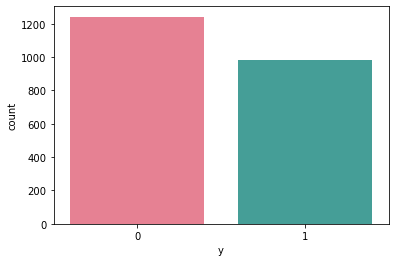

In [10]:
sns.countplot(df['y'], palette='husl')

In [11]:
#Checking for null values
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [12]:
#Removing the rows with null values
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [14]:
# Finding Outliers using Z-Score

from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[1.52953452e+00 2.99941733e-02 1.12337775e+00]
 [1.28583072e+00 2.99999411e-02 1.12337775e+00]
 [1.67518040e+00 2.99969302e-02 1.12337775e+00]
 ...
 [1.20720924e+00 2.99979109e-02 8.90172516e-01]
 [1.11758091e+00 3.00063617e-02 8.90172516e-01]
 [1.52687860e+00 3.34595047e+01 8.90172516e-01]]


In [15]:
threshold = 3
print(np.where(z > 3))

(array([1533, 2218], dtype=int64), array([1, 1], dtype=int64))


In [16]:
df = df[(z < 3).all(axis=1)]

In [17]:
#Final DataSet Shape
df.shape

(2217, 3)

## Building Models

In [18]:
X=df.drop(['y'],axis=1)
y = df['y']

In [19]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

### 1. Logistic Regression

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [58]:
params1 = {"solver" : ['newton-cg', 'lbfgs', 'liblinear'],
           "penalty" : ['l1','l2'],
           "C" : [0.01, 0.1, 1, 10, 100]}

lr1 = GridSearchCV(lr, params1, n_jobs=-1)

In [59]:
lr1.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [60]:
prediction_lr = lr1.predict(X_test)

In [61]:
#Calculating the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = []
acc = accuracy_score(y_test, prediction_lr)
accuracy.append(int(acc*100))
print("Accuracy: ",acc)

Accuracy:  0.7297297297297297


In [62]:
from sklearn import metrics
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction_lr,y_test))

Confusion Metrix:
 [[362 152]
 [ 28 124]]


### 2. SVM with Linear Kernel

In [48]:
from sklearn import svm

svc = svm.SVC()

In [49]:
params2 = {'C': [0.1,1, 10, 100], 
           'gamma': [1,0.1,0.01,0.001],
           'kernel': ['linear']}

In [ ]:
svc2 = GridSearchCV(svc, params2, n_jobs=-1)

svc2.fit(X_train, y_train)

In [ ]:
prediction_svm_lk = svc2.predict(X_test)

In [ ]:
#Calculating the accuracy of the model
acc1=accuracy_score(y_test, prediction_svm_lk)
accuracy.append(int(acc1*100))
print("Accuracy: ",acc1)

In [ ]:
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction_svm_lk,y_test))

### 3. SVM with RBF Kernel

In [63]:
svc = svm.SVC()

params3 = {'C': [0.1,1, 10, 100], 
           'gamma': [1,0.1,0.01,0.001],
           'kernel': ['rbf'] }

svc3 = GridSearchCV(svc, params3,  n_jobs=-1)

svc3.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [64]:
prediction_svm_rbf = svc3.predict(X_test)

In [65]:
#Calculating the accuracy of the model
acc2=accuracy_score(y_test, prediction_svm_rbf)
accuracy.append(int(acc2*100))
print("Accuracy: ",acc2)

Accuracy:  0.9504504504504504


In [66]:
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction_svm_rbf,y_test))

Confusion Metrix:
 [[367  10]
 [ 23 266]]


### 4. Decision Tree

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1234)

In [68]:
#Hyper Parameters Set
params4 = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

In [69]:
clf1 = GridSearchCV(clf, params4, n_jobs=-1)

In [70]:
clf1.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15],
                         'random_state': [123]})

In [71]:
#The best hyper parameters set
print("Best Hyper Parameters:",clf1.best_params_)

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 11, 'random_state': 123}


In [72]:
prediction_dt = clf1.predict(X_test)

In [73]:
#Calculating the accuracy of the model
acc3=accuracy_score(y_test, prediction_dt)
accuracy.append(int(acc3*100))
print("Accuracy: ",acc3)

Accuracy:  0.9474474474474475


In [74]:
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction_dt,y_test))

Confusion Metrix:
 [[375  20]
 [ 15 256]]


### 5. KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
model = KNeighborsClassifier(n_jobs=-1)

In [78]:
#Hyper Parameters Set
params5 = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

model1 = GridSearchCV(model, param_grid=params5, n_jobs=1)

model1.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [79]:
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'distance'}


In [80]:
prediction_knn = model1.predict(X_test)

In [81]:
#Calculating the accuracy of the model
acc4=accuracy_score(y_test, prediction_knn)
accuracy.append(int(acc4*100))
print("Accuracy: ",acc4)

Accuracy:  0.954954954954955


In [82]:
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction_knn,y_test))

Confusion Metrix:
 [[370  10]
 [ 20 266]]


## Comparision 

Text(0.5, 1.0, 'Accuracies of Models')

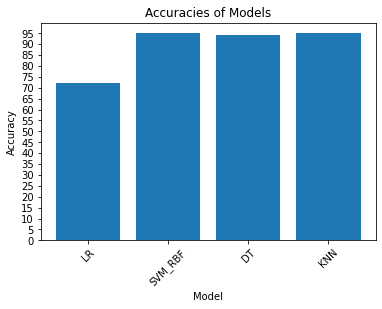

In [83]:
Index = [1,2,3,4]
name=["LR","SVM_RBF","DT","KNN"]
plt.bar(Index,accuracy)
plt.xticks(Index, name, rotation=45)
plt.yticks(np.arange(0, 100, 5)) 
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

## Conclusion

In [84]:
accuracy

[72, 95, 94, 95]

Model trained on SVM with RBF Kernel and KNN performed the best in classifying the dataset. The accuracy was found to be 95 %